In [8]:
from bbg_helpers import retrieve_data, init_bbg_session, BBG_IP
import pandas as pd

In [13]:
with init_bbg_session(BBG_IP) as session:
    hist_data = retrieve_data(session, ["USFS022 Curncy", "USFS0230 Curncy"], ["PX_LAST"], start_date=pd.datetime(1994, 1, 1))

<IPython.core.display.Javascript object>


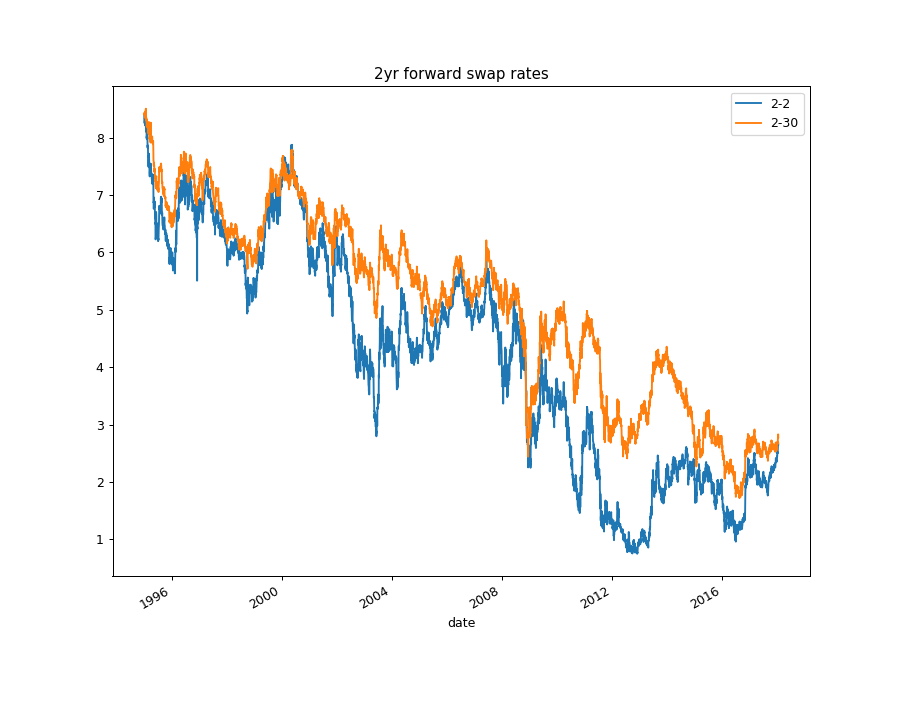

In [39]:
df = pd.concat(hist_data).unstack(level=0)
df.columns = ['2-2', '2-30']
df.plot(title='2yr forward swap rates')

<IPython.core.display.Javascript object>


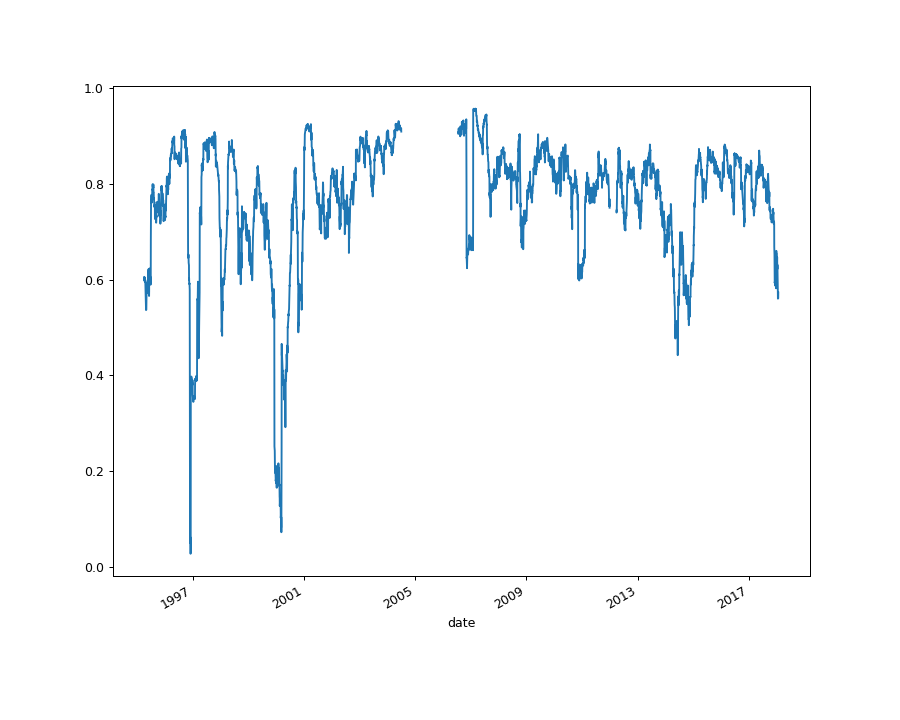

In [68]:
#not sure why this doesn't work
#df.pct_change().rolling(window='91D').corr().unstack(1)[('2-2', '2-30')].plot()
#rolling 3 months correlation
df.pct_change().rolling(window=63).corr().unstack(1)[('2-2', '2-30')].plot()

<IPython.core.display.Javascript object>


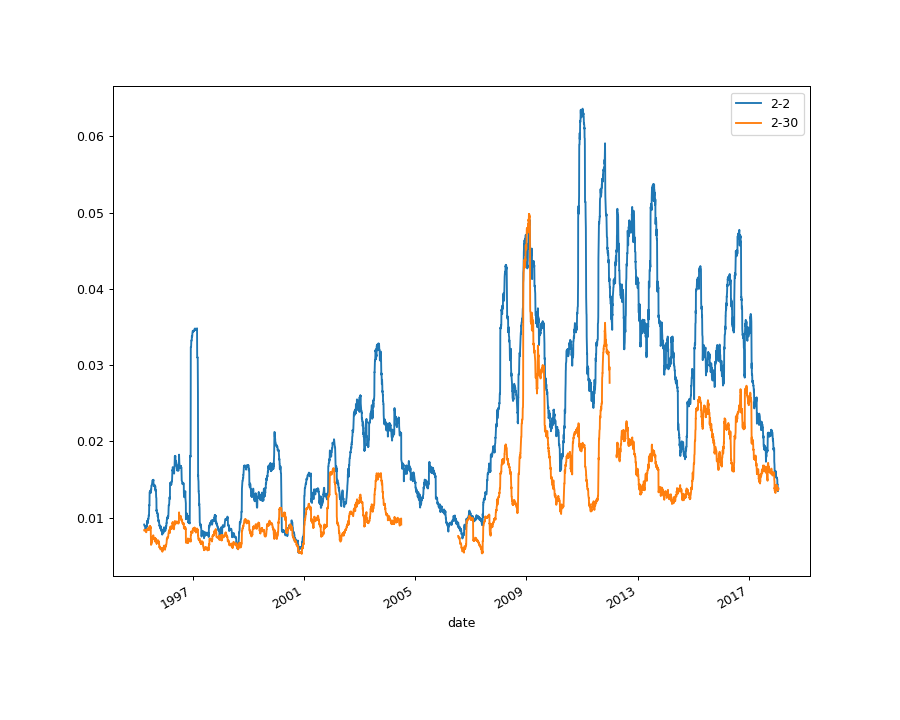

In [70]:
#3months realized vol
roll = df.pct_change().rolling(window=63).std().plot()